In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,auc

import warnings as w
w.filterwarnings('ignore')

## Analyzing Dataset

In [2]:
df=pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

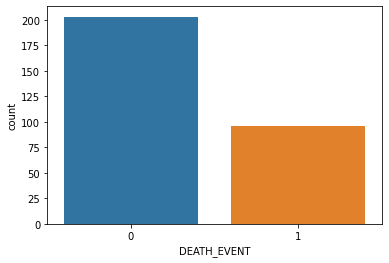

In [5]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

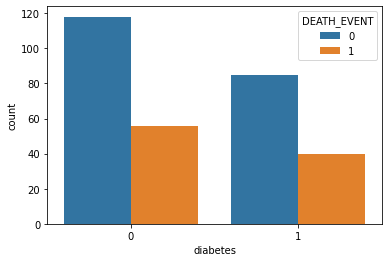

In [6]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

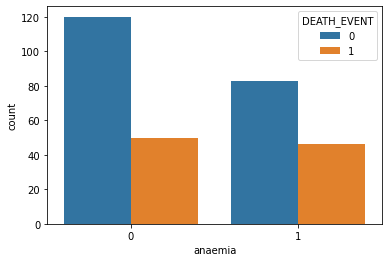

In [7]:
sns.countplot(x='anaemia',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

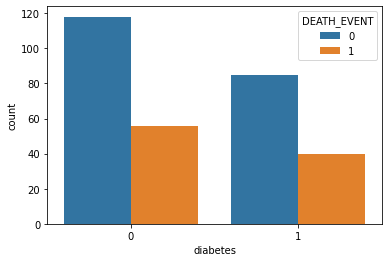

In [8]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

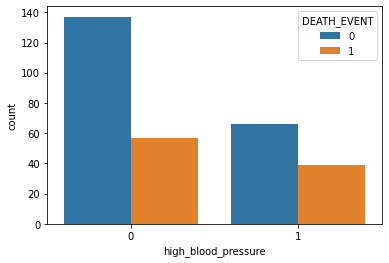

In [9]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler()

In [56]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0.000166,0,20,1,1.681648e-02,1.9,130,1,0,4,1
1,55.0,0,7.514640,0,38,0,7.535660e-09,1.1,136,1,0,6,1
2,65.0,0,-0.449939,0,20,0,-1.038073e+00,1.3,129,1,1,7,1
3,50.0,1,-0.486071,0,20,0,-5.464741e-01,1.9,137,1,0,7,1
4,65.0,1,-0.435486,1,20,0,6.517986e-01,2.7,116,0,0,8,1


In [57]:
colls=('creatinine_phosphokinase','platelets')

In [58]:
for col in colls:
    df[col]=stscaler.fit_transform(df[[col]])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0.000166,0,20,1,1.681648e-02,1.9,130,1,0,4,1
1,55.0,0,7.514640,0,38,0,7.535660e-09,1.1,136,1,0,6,1
2,65.0,0,-0.449939,0,20,0,-1.038073e+00,1.3,129,1,1,7,1
3,50.0,1,-0.486071,0,20,0,-5.464741e-01,1.9,137,1,0,7,1
4,65.0,1,-0.435486,1,20,0,6.517986e-01,2.7,116,0,0,8,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.5 KB


In [60]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [61]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Visualizing dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

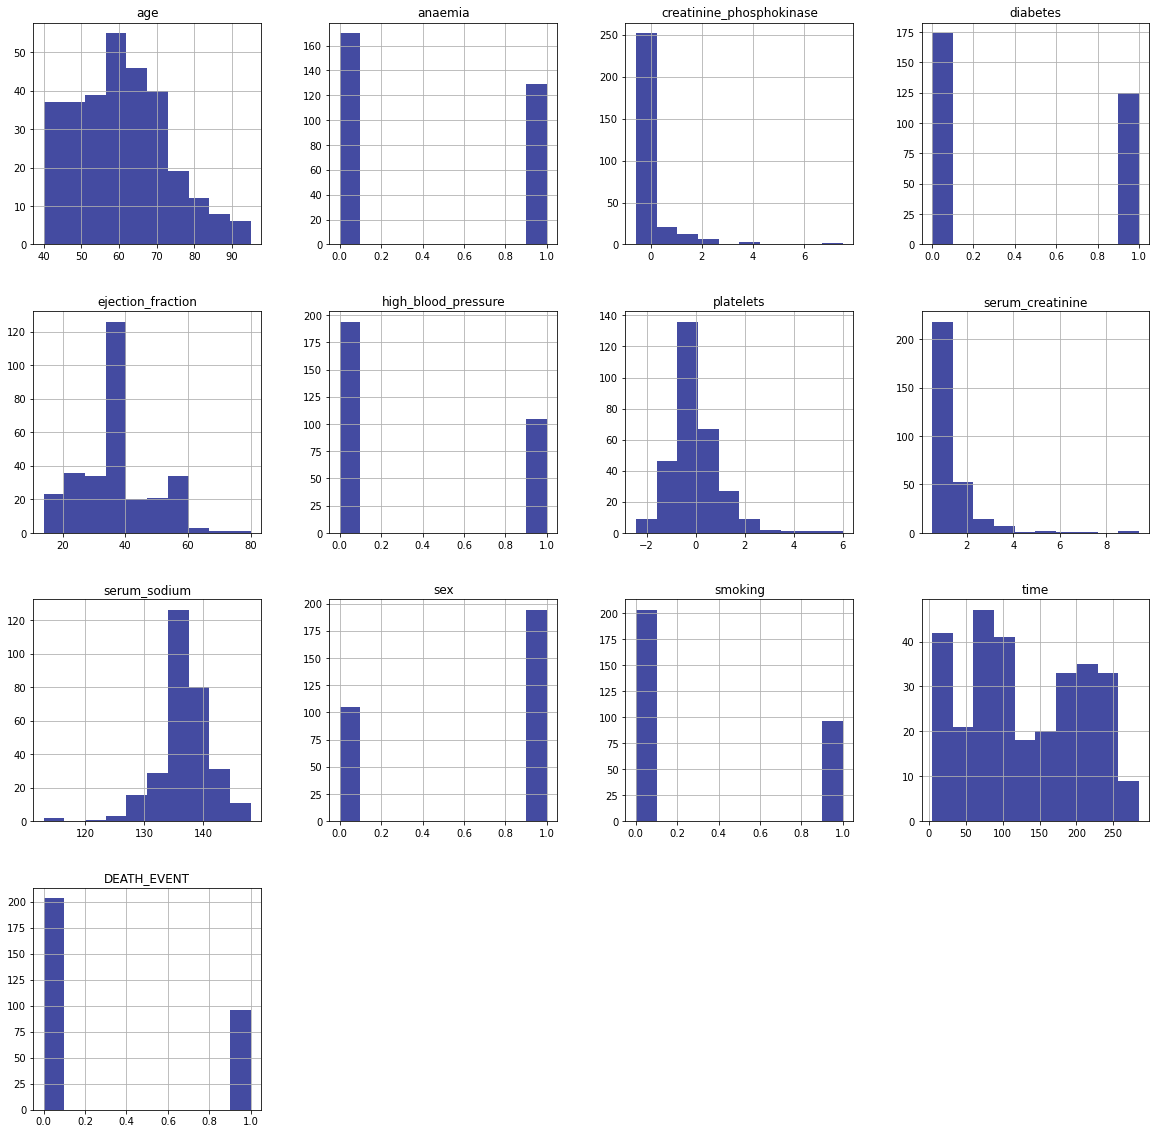

In [62]:
df.hist(figsize=(20,20),color='#444BA1')

<AxesSubplot:title={'center':'Correlation for Every Features'}>

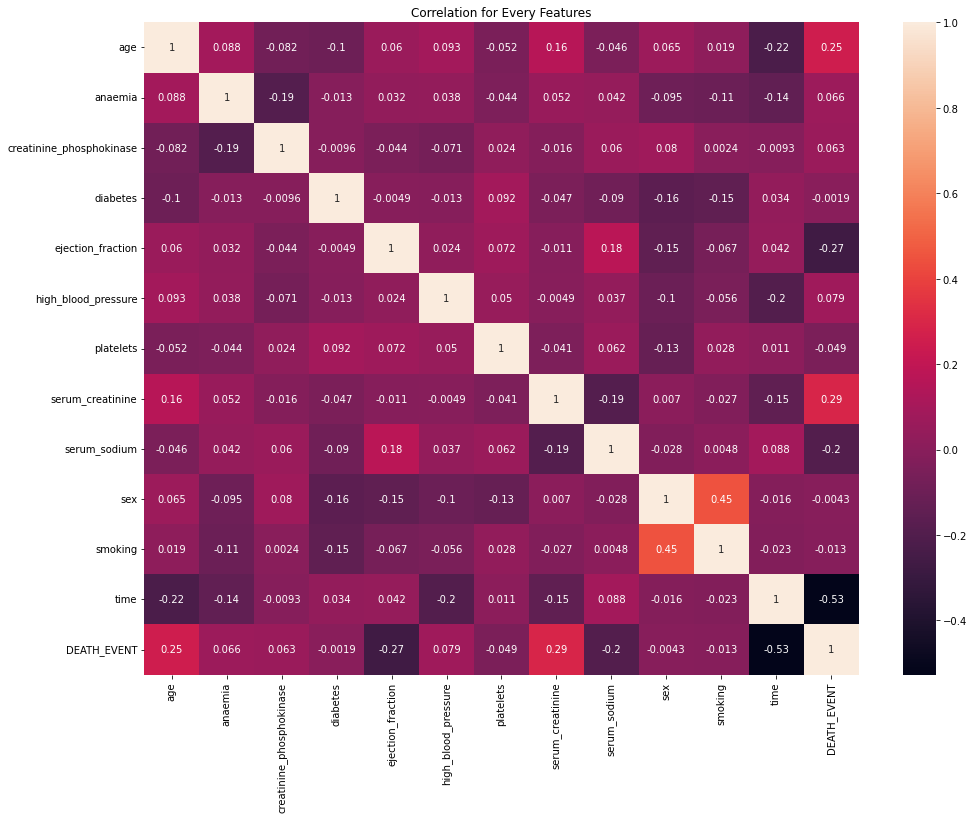

In [63]:
plt.figure(figsize=(16,12))
plt.title('Correlation for Every Features')
sns.heatmap(df.corr(),annot=True)

## Seperate Dataset x,y for Training 

In [64]:
x=df.drop('DEATH_EVENT',axis=1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,0.000166,0,20,1,1.681648e-02,1.9,130,1,0,4
1,55.0,0,7.514640,0,38,0,7.535660e-09,1.1,136,1,0,6
2,65.0,0,-0.449939,0,20,0,-1.038073e+00,1.3,129,1,1,7
3,50.0,1,-0.486071,0,20,0,-5.464741e-01,1.9,137,1,0,7
4,65.0,1,-0.435486,1,20,0,6.517986e-01,2.7,116,0,0,8


In [65]:
y=df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

## Split The DataSet for Training - Test

In [144]:
x_train,x_test,y_train,y_test=tts(x,y, test_size=0.30, random_state=47)

In [145]:
x_train.shape

(209, 12)

In [146]:
x_test.shape

(90, 12)

In [147]:
dtc=DecisionTreeClassifier()

In [148]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(657.8693181818181, 1556.6727272727271, 'time <= 66.5\ngini = 0.413\nsamples = 209\nvalue = [148, 61]'),
 Text(202.9090909090909, 1408.418181818182, 'serum_creatinine <= 0.85\ngini = 0.184\nsamples = 39\nvalue = [4, 35]'),
 Text(101.45454545454545, 1260.1636363636362, 'platelets <= -0.741\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(50.72727272727273, 1111.909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(152.1818181818182, 1111.909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(304.3636363636364, 1260.1636363636362, 'serum_creatinine <= 2.25\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(253.63636363636363, 1111.909090909091, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(355.09090909090907, 1111.909090909091, 'serum_sodium <= 135.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(304.3636363636364, 963.6545454545454, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(405.8181818181818, 963.6545454545454, 'serum_creatinine <= 4.75\n

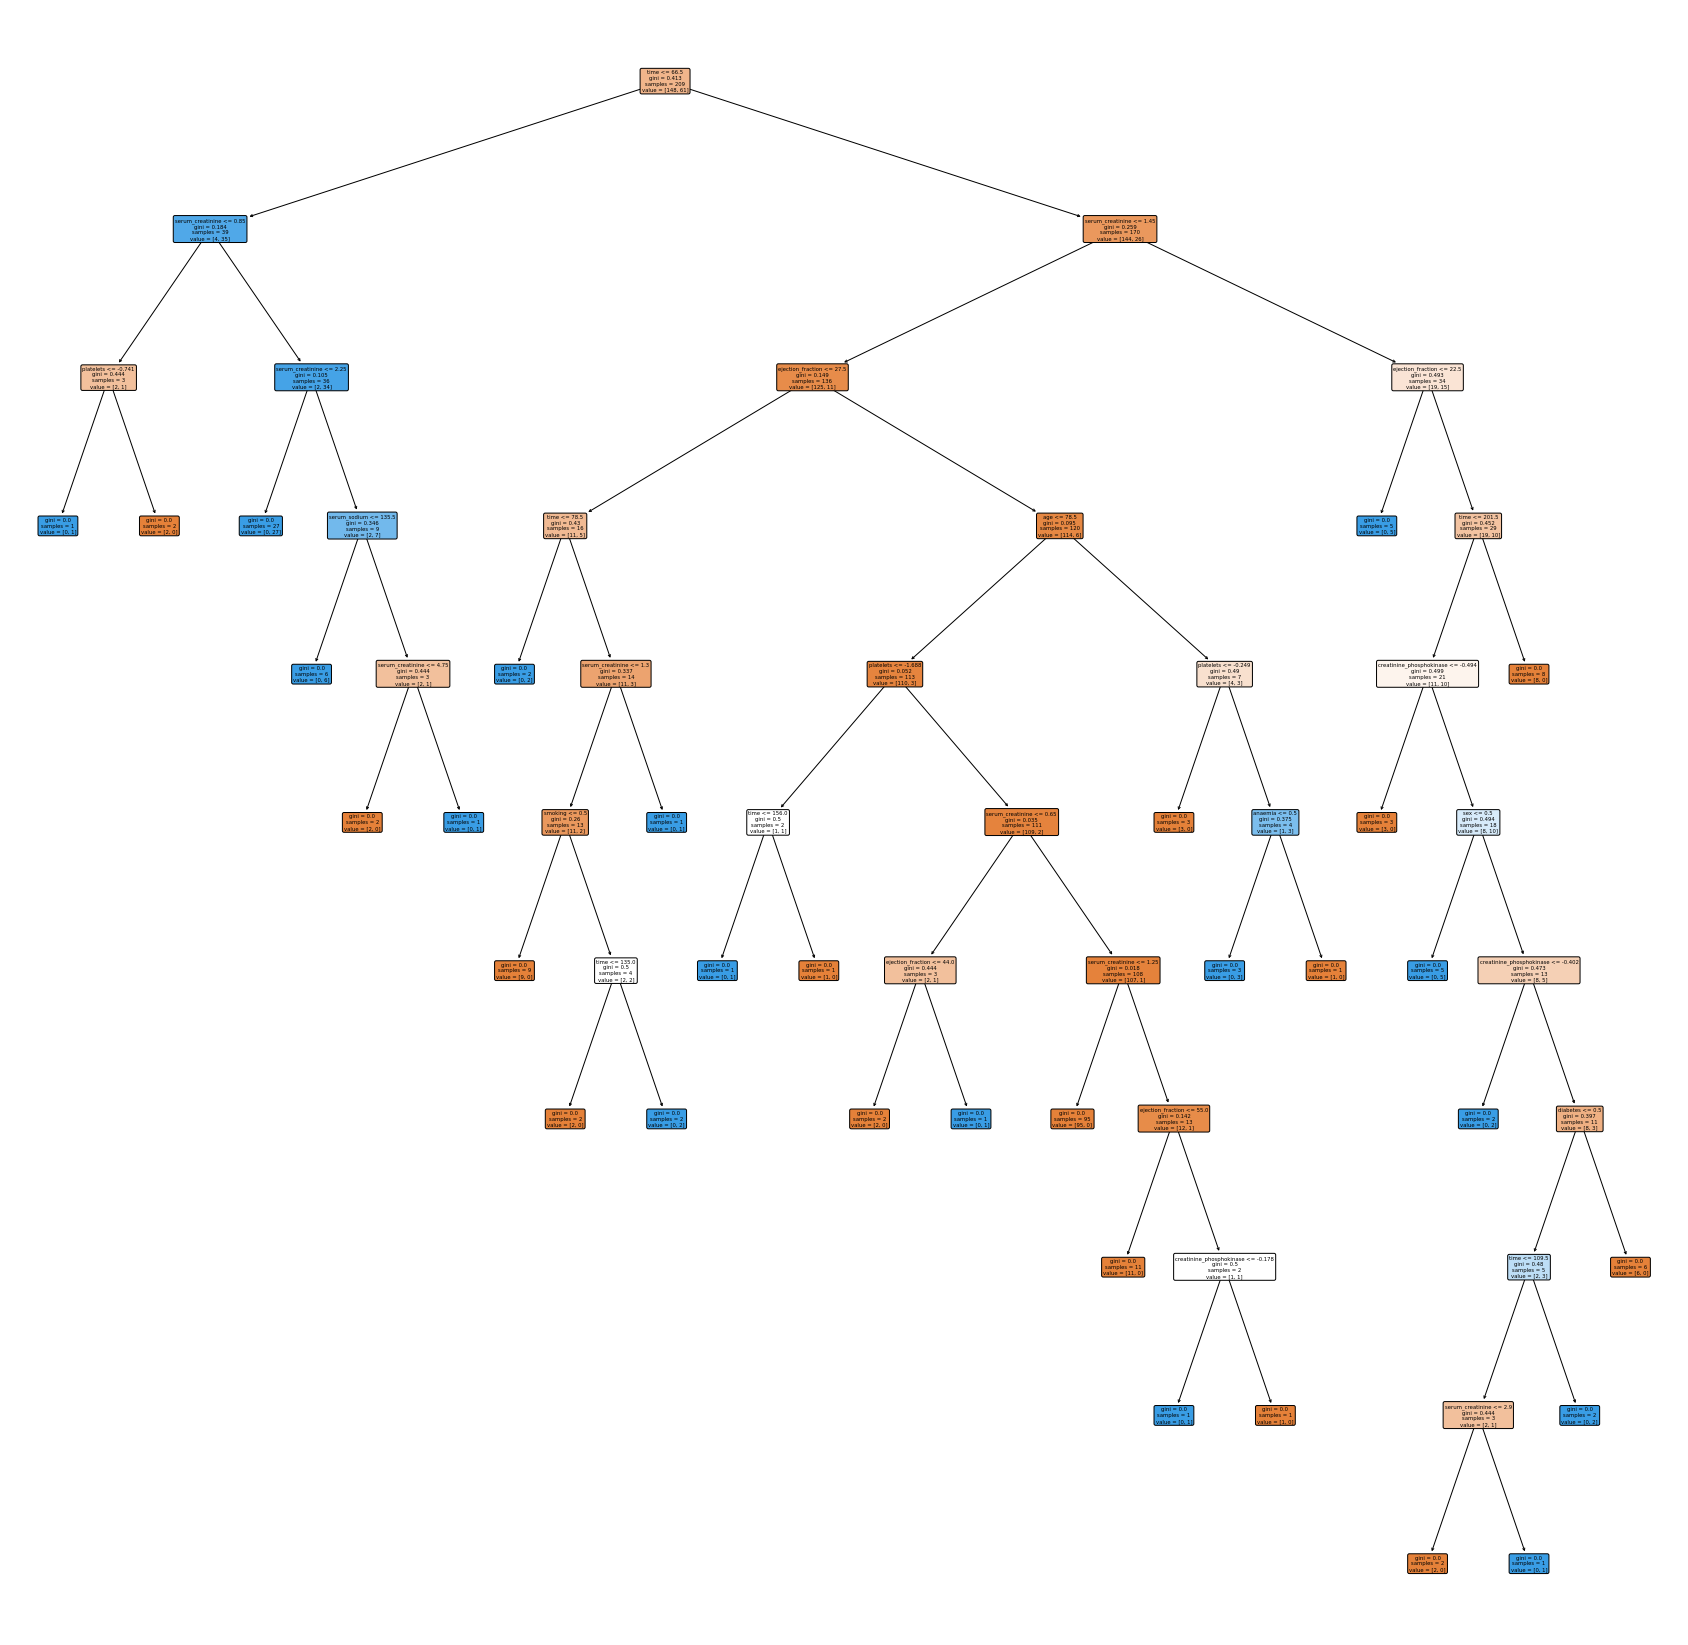

In [149]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc,filled=True, rounded=True, feature_names=x.columns)

In [150]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [151]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

## Confusion Matrix

In [152]:
classification_report(y_test,dtc_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.84        55\n           1       0.75      0.77      0.76        35\n\n    accuracy                           0.81        90\n   macro avg       0.80      0.80      0.80        90\nweighted avg       0.81      0.81      0.81        90\n'

In [153]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        55
           1       0.75      0.77      0.76        35

    accuracy                           0.81        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90



In [154]:
con_matrix=confusion_matrix(y_test,dtc_pred)
con_matrix

array([[46,  9],
       [ 8, 27]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix HeatMap')

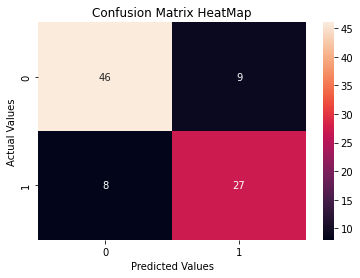

In [155]:
sns.heatmap(con_matrix,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix HeatMap')

In [156]:
tp, fn,fp,tn=confusion_matrix(y_test,dtc_pred).reshape(-1)

In [157]:
tp,fn,fp,tn

(46, 9, 8, 27)

In [158]:
#roc_curve,precision_score,recall_score,f1_score,auc


## Accuracy

In [159]:
accuracy_score(y_test,dtc_pred)

0.8111111111111111

In [160]:
acc_score=(tp+tn)/(tp+tn+fn+fp)

In [161]:
acc_score

0.8111111111111111

## Precision

In [162]:
prec=tp/(tp+fp)
prec

0.8518518518518519

In [163]:
precision_score(y_test,dtc_pred)

0.75

## Recall or TPR (True Positive Rate)

In [164]:
recll=tp/(tp+fn)
recll

0.8363636363636363

In [165]:
%recall

In [ ]:
0.8363636363636363

In [166]:
recall_score(y_test,dtc_pred)

0.7714285714285715

## Harmonic Mean, F1 Score

In [176]:
f1_score(y_test,dtc_pred,average='micro')

0.8111111111111111

In [177]:
f1=(2*prec*recll)/(prec+recll)

In [178]:
f1

0.8440366972477065

## F1 Measure

In [175]:
f1_mes=(prec+recll)/2
f1_mes

0.844107744107744

## AUC Curve

In [185]:
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve,roc_auc_score

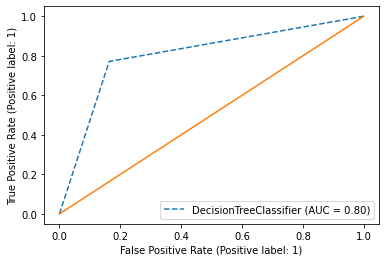

In [192]:
plot_roc_curve(dtc,x_test,y_test,linestyle='--')
plt.plot([0,1],[0,1])

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_pred)
fpr
tpr
thresholds

array([2, 1, 0], dtype=int64)

In [186]:
auc = roc_auc_score(y_test, dtc_pred)
auc

0.8038961038961039